In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
#Checking Null values and features datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Data Analysis
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [ ]:
data['children'].value_counts().sort_values()

,count
children,
5,42
4,52
3,324
2,496
1,672
0,1186


In [10]:
data['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

In [13]:
#Encoding the categorical features
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)


In [14]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [15]:
data_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


In [ ]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./AnalysisImages/Cor')
plt.show()

In [ ]:
# #smoker,bmi and age are the most important factors that determine charges.sex,region and children do not
# affect the charge

In [17]:
print(data['sex'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())
print(data['children'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64
5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: './AnalysisImages/AgevsCharges.png'

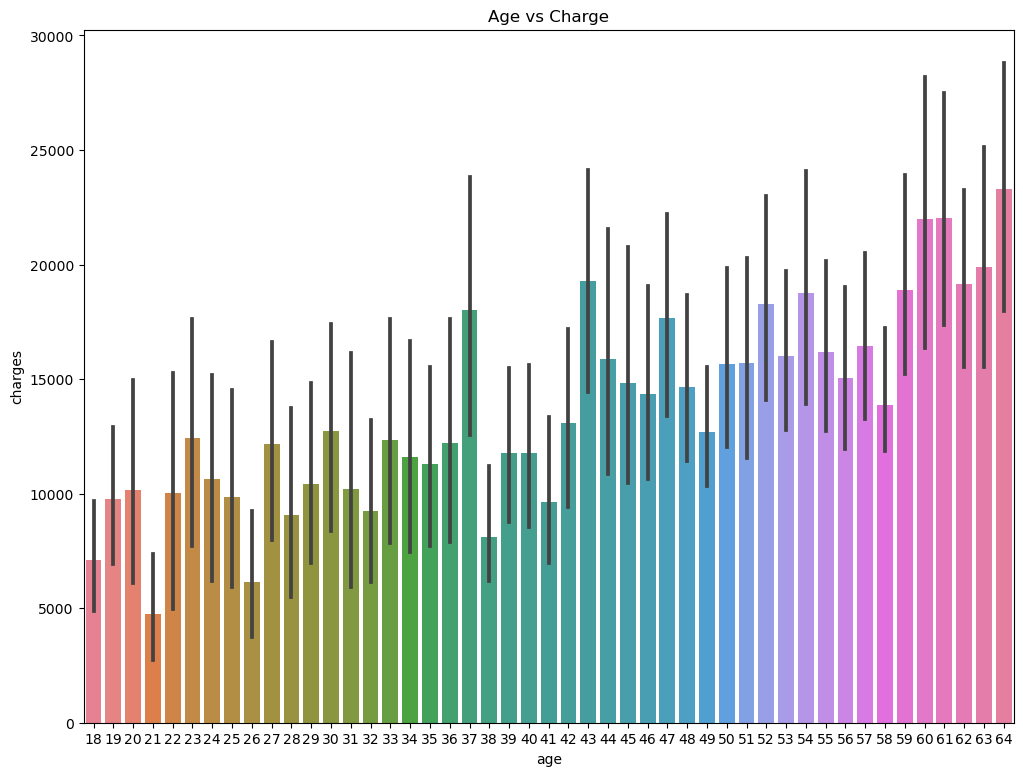

In [18]:
#Age vs Charge
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.savefig('./AnalysisImages/AgevsCharges')


<ipython-input-19-f2ae0f433c5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/RegionvsCharges.png'

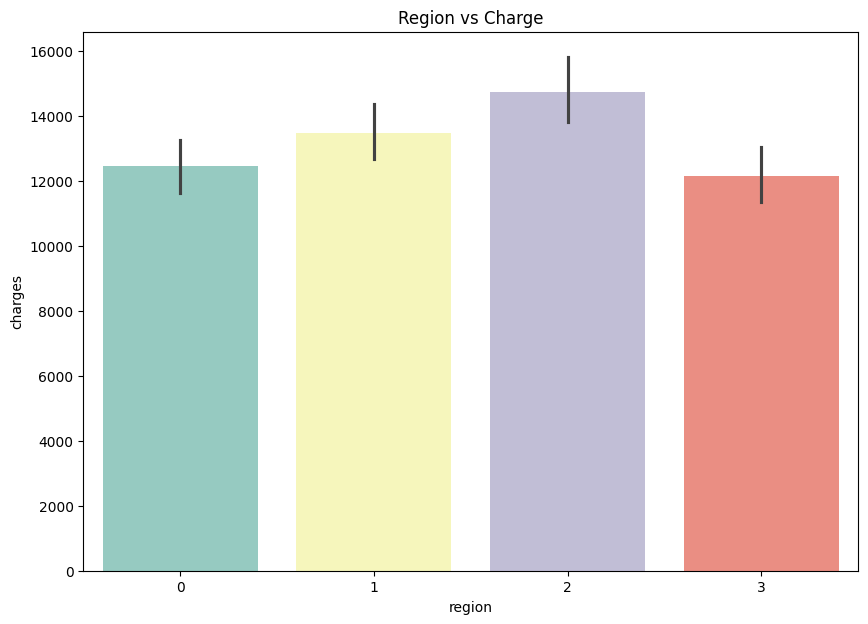

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')
plt.savefig('./AnalysisImages/RegionvsCharges')


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/BmivsCharges.png'

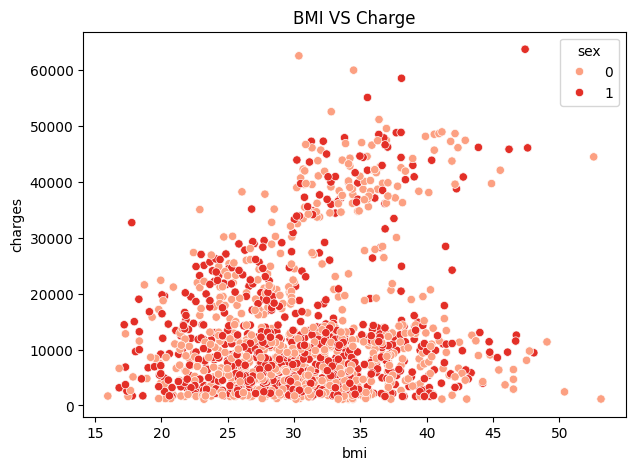

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')
plt.savefig('./AnalysisImages/BmivsCharges')


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/SmokervsCharges.png'

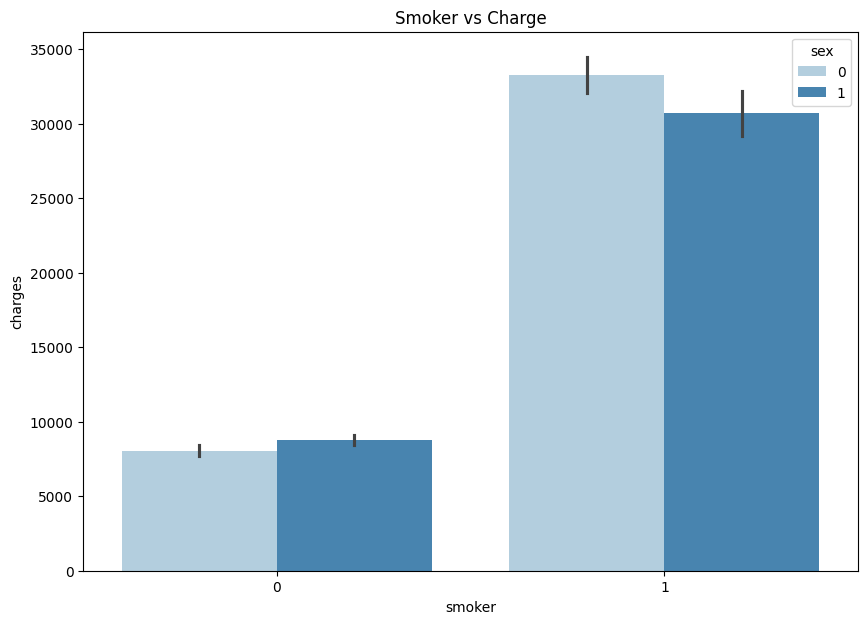

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')
plt.savefig('./AnalysisImages/SmokervsCharges')


<ipython-input-22-cbf65a095e6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/SexvsCharges.png'

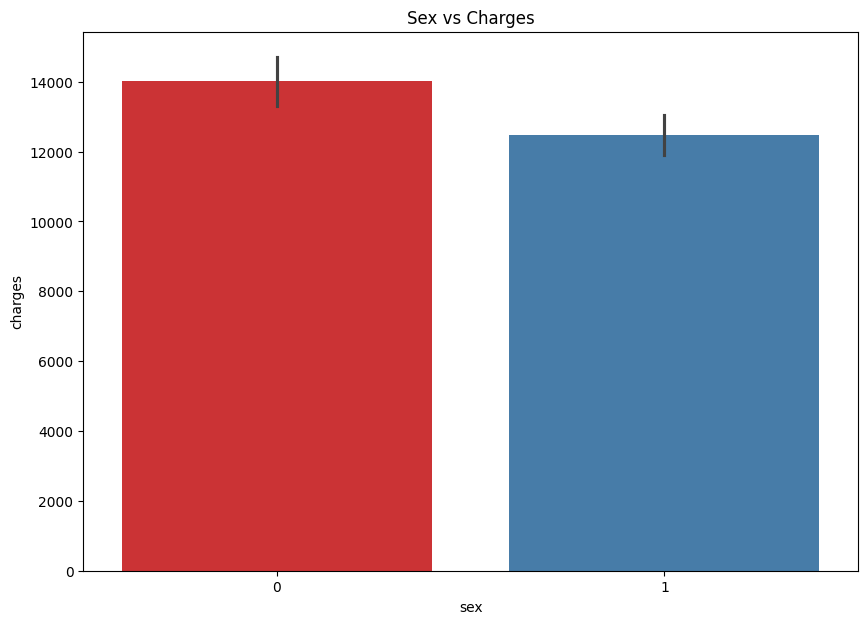

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')
plt.savefig('./AnalysisImages/SexvsCharges')


In [ ]:
#Plotting Skew and Kurtosis
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))


Printing Skewness and Kurtosis for all columns

age : Skewness 0.062 and  Kurtosis -1.253
sex : Skewness 0.029 and  Kurtosis -2.001
bmi : Skewness 0.280 and  Kurtosis -0.090
children : Skewness 0.955 and  Kurtosis 0.259
smoker : Skewness 1.474 and  Kurtosis 0.173
region : Skewness -0.061 and  Kurtosis -1.327
charges : Skewness 1.511 and  Kurtosis 1.566


<ipython-input-24-b2a2e81fc497>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/PlotForAge.png'

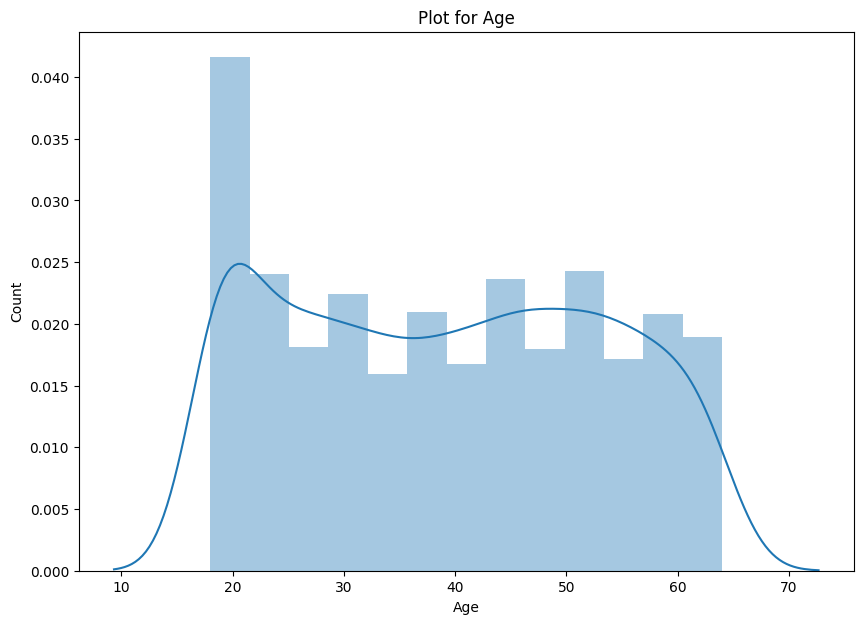

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./AnalysisImages/PlotForAge')


In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.savefig('./AnalysisImages/PlotForBMI')


<ipython-input-25-3e9c3d949f4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['charges'])


FileNotFoundError: [Errno 2] No such file or directory: '/content/AnalysisImages/PlotForCharges.png'

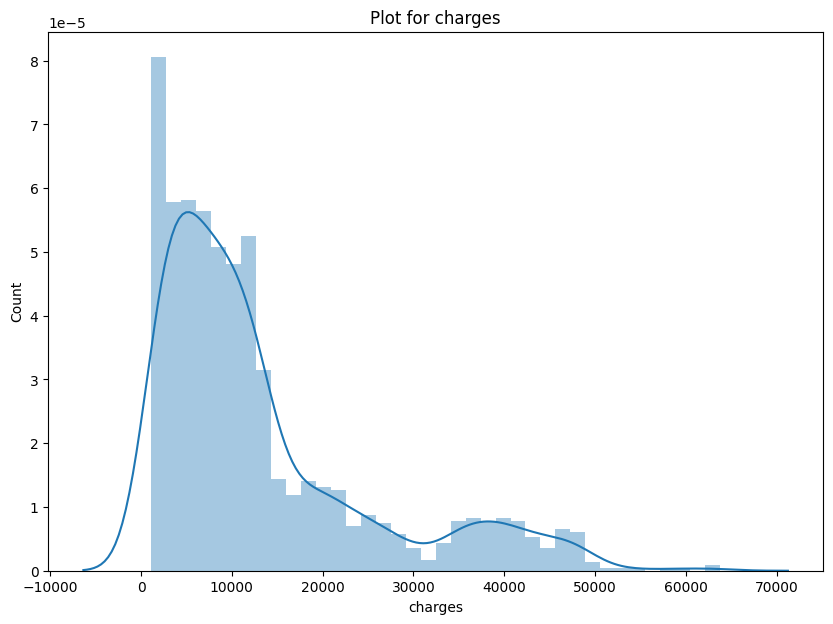

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.savefig('./AnalysisImages/PlotForCharges')


In [19]:
#performing scalerization on bmi,age and charges
from sklearn.preprocessing import StandardScaler
data_scaled = data_copy.copy()

tempBmi = data_scaled.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_scaled['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_scaled.age
tempAge = tempAge.values.reshape(-1,1)
data_scaled['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_scaled.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_scaled['charges'] = StandardScaler().fit_transform(tempCharges)

In [20]:
data_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [21]:
X = data_scaled.drop('charges',axis=1).values
y = data_scaled['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=22)

In [22]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [31]:
X_train.head(5)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV

In [24]:
import numpy as np

class MyLR:
    def __init__(self):
        self.coef_ = None 
        self.intercept_ = None

    def fit(self, X_train, y_train):
        # Convert to NumPy arrays if input is a DataFrame or Series
        if not isinstance(X_train, np.ndarray):
            X_train = X_train.to_numpy()
        if not isinstance(y_train, np.ndarray):
            y_train = y_train.to_numpy()
        
        # Add bias term to X_train
        X_train = np.insert(X_train, 0, 1, axis=1)

        # Compute coefficients using the normal equation
        betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        # Convert to NumPy array if input is a DataFrame
        if not isinstance(X_test, np.ndarray):
            X_test = X_test.to_numpy()
        
        # Add bias term to X_test
        X_test = np.insert(X_test, 0, 1, axis=1)

        # Compute predictions
        y_pred = np.dot(X_test, np.hstack(([self.intercept_], self.coef_)))
        return y_pred


In [27]:
lr = MyLR()
lr.fit(X_train, y_train)

In [28]:
lr.predict(X_test)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 6

In [ ]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

CPU times: user 3.78 ms, sys: 857 µs, total: 4.64 ms
Wall time: 18.3 ms


LinearRegression()

In [ ]:
cv_linear_reg = cross_val_score(linear_reg,X,y,cv=10)
y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train,y_pred_linear_reg_train)
y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test,y_pred_linear_reg_test)
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))


In [ ]:
print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.748
R2_score (train) : 0.744
R2_score (test) : 0.775
RMSE : 0.477


In [ ]:
import joblib

# Save the trained model
joblib.dump(linear_reg, 'linear_reg_model.pkl')


['linear_reg_model.pkl']